## **Load data**

In [ ]:
import pandas as pd
import numpy as np
import math

dt = pd.read_csv("EMG.csv")

In [ ]:
X_train = dt["X"].head(1000)
Y_train = np.array(dt["Y"].head(1000)).reshape(1000,1)

X_test = dt["X"].tail(100)
Y_test = np.array(dt["Y"].tail(100)).reshape(100, 1)

## **Normaliz data**

In [ ]:
def normaliz_data(X):
  min_x = np.min(X)
  max_x = np.max(X)
  return (X-min_x)/(max_x-min_x)

In [ ]:
X_train = normaliz_data(X_train)
X_test = normaliz_data(X_test)

## **Matrice $K_{\alpha}$**

In [ ]:
def k(x, y, sigma):
    return np.exp(-np.square(x - y) / (2 * sigma**2))

In [ ]:
def matrice_k_alpha(x, sigma):
    x = np.array(x)
    length = len(x)
    matrice = np.zeros((length, length))

    for i in range(length):
        matrice[i, :] = k(x[i], x, sigma)

    return matrice

In [ ]:
import numpy as np

def calcule_des_f(alpha, X):
    myList = []
    for i in X.values:
        myList.append(f(alpha, X.values, i))
    return myList

def f(alpha, X, pred):
    s = 0
    for i in range(len(X)):
        s += alpha[i] * k(pred, X[i], 0.001)
    return s


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from itertools import product

liste_lam = [0.1, 0.5]
liste_lr = [0.001, 0.01]

param_grid = {'lam': liste_lam, 'lr': liste_lr}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

performances_par_parametres = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    alpha = np.zeros((len(X_train_fold), 1))

    combinaisons_parametres = product(liste_lam, liste_lr)
    for lam, lr in combinaisons_parametres:
        print(f"lam : {lam}, lr:{lr}")
        grand_k = matrice_k_alpha(X_train_fold, 0.001)

        alpha = np.zeros((len(X_train_fold), 1))

        i = 0
        while True:
            alpha = alpha - lr * gradJ(grand_k, alpha, Y_train_fold, lam)
            i += 1
            if i >= 2000:
                break

        mse = mean_squared_error(Y_val_fold, calcule_des_f(alpha,X_val_fold))
        performances_par_parametres.append({'mse': mse, 'lam': lam, 'lr': lr})


lam : 0.1, lr:0.001
lam : 0.1, lr:0.01
lam : 0.5, lr:0.001
lam : 0.5, lr:0.01
lam : 0.1, lr:0.001
lam : 0.1, lr:0.01
lam : 0.5, lr:0.001
lam : 0.5, lr:0.01
lam : 0.1, lr:0.001
lam : 0.1, lr:0.01
lam : 0.5, lr:0.001
lam : 0.5, lr:0.01
lam : 0.1, lr:0.001
lam : 0.1, lr:0.01
lam : 0.5, lr:0.001
lam : 0.5, lr:0.01
lam : 0.1, lr:0.001
lam : 0.1, lr:0.01
lam : 0.5, lr:0.001
lam : 0.5, lr:0.01


In [ ]:
performances_par_parametres

[{'mse': 0.010171763733598042, 'lam': 0.1, 'lr': 0.001},
 {'mse': 0.013585669804857918, 'lam': 0.1, 'lr': 0.01},
 {'mse': 0.009267617099194212, 'lam': 0.5, 'lr': 0.001},
 {'mse': 0.01166099489595817, 'lam': 0.5, 'lr': 0.01},
 {'mse': 0.00978797219222877, 'lam': 0.1, 'lr': 0.001},
 {'mse': 0.013323753712641497, 'lam': 0.1, 'lr': 0.01},
 {'mse': 0.008903841231945302, 'lam': 0.5, 'lr': 0.001},
 {'mse': 0.011320882155551935, 'lam': 0.5, 'lr': 0.01},
 {'mse': 0.008199291958195099, 'lam': 0.1, 'lr': 0.001},
 {'mse': 0.013475227090536808, 'lam': 0.1, 'lr': 0.01},
 {'mse': 0.007286337942646148, 'lam': 0.5, 'lr': 0.001},
 {'mse': 0.010796559148567555, 'lam': 0.5, 'lr': 0.01},
 {'mse': 0.010346288477443202, 'lam': 0.1, 'lr': 0.001},
 {'mse': 0.014574593256406199, 'lam': 0.1, 'lr': 0.01},
 {'mse': 0.00933579291003929, 'lam': 0.5, 'lr': 0.001},
 {'mse': 0.011919754908237571, 'lam': 0.5, 'lr': 0.01},
 {'mse': 0.011123317452206937, 'lam': 0.1, 'lr': 0.001},
 {'mse': 0.011633761378777618, 'lam': 0.1,

In [ ]:
def gradJ(K, alpha, y, lmbd):
    # Calculate the gradient of J
    term1 = 2 * np.dot(K.T, np.dot(K, alpha) - y)
    term2 = 2 * lmbd * np.dot(K.T, np.dot(K, alpha))
    gradient = term1 + term2

    return gradient

In [ ]:
def costFunction(alphai,k,y,l):
  yhat=np.dot(k,alphai)
  J=np.linalg.norm(yhat-y,ord=2)*2+l*np.linalg.norm(yhat,ord=2)*2
  return J/len(y)

In [ ]:
alpha = np.zeros((1000,1))
lam = 0.5
lr = 0.001
grand_k = matrice_k_alpha(X_train, 0.001)

In [ ]:
i=0
alpha = np.zeros((1000,1))
lam = 0.5
lr = 0.001
cost_list = []
grand_k = matrice_k_alpha(X_train, 0.001)
while True:
  alpha = alpha - lr*gradJ(grand_k,alpha,Y_train,lam)
  loss = costFunction(alpha,grand_k,Y_train,lam)
  cost_list.append(loss)
  i+=1
  if i>=2000 or loss < 0.0001:
    break

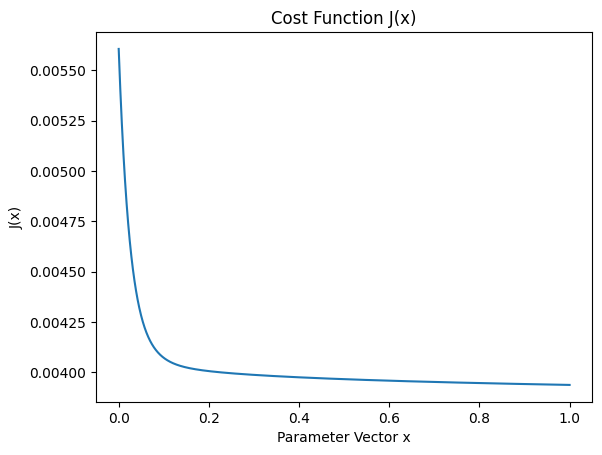

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Generate a range of x values
x_values = np.linspace(0, 1, 2000)


# Plot the cost function
plt.plot(x_values, cost_list)
plt.title('Cost Function J(x)')
plt.xlabel('Parameter Vector x')
plt.ylabel('J(x)')
plt.show()


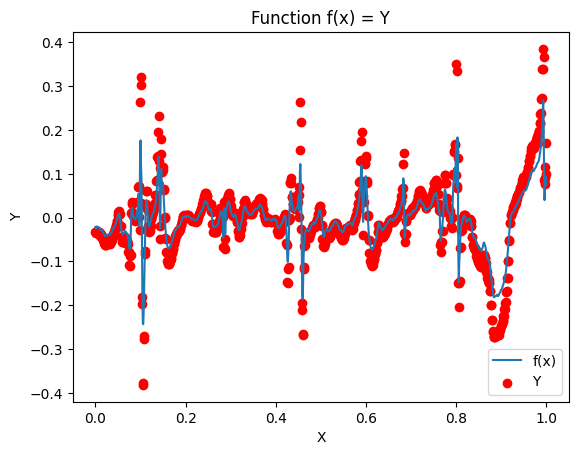

In [ ]:
plt.plot(X_train, calcule_des_f(alpha,X_train), label='f(x)')
plt.scatter(X_train, Y_train, color='red', label='Y')
plt.title('Function f(x) = Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## **Adam**

In [ ]:
import numpy as np

def adam(x, y, alphai, Ksigma, l, eps, nu, beta1=0.9, beta2=0.999):
    J = []
    vdw = np.zeros(alphai.shape)
    sdw = np.zeros(alphai.shape)
    gJ = gradJ(Ksigma, alphai, y, l)

    for i in range(2000):
        vdw = beta1 * vdw + (1 - beta1) * gJ
        sdw = beta2 * sdw + (1 - beta2) * gJ**2
        vdwCorr = vdw / (1 - beta1**(i+1))
        sdwCorr = sdw / (1 - beta2**(i+1))
        alphai = alphai - nu * (vdwCorr / (np.sqrt(sdwCorr) + eps))

        gJ = gradJ(Ksigma, alphai, y, l)

        J.append(costFunction(alphai,Ksigma,y,l))

    return alphai, J

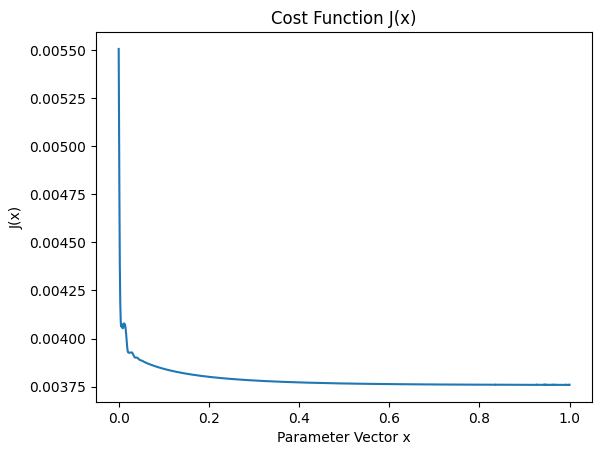

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphadam = np.zeros((1000,1))
# Generate a range of x values
x_values = np.linspace(0, 1, 2000)

alphadam,j = adam(x=X_train,y=Y_train,alphai=alphadam,Ksigma=grand_k,l=lam,eps=0.001,nu=0.01)
# Plot the cost function
plt.plot(x_values, j)
plt.title('Cost Function J(x)')
plt.xlabel('Parameter Vector x')
plt.ylabel('J(x)')
plt.show()


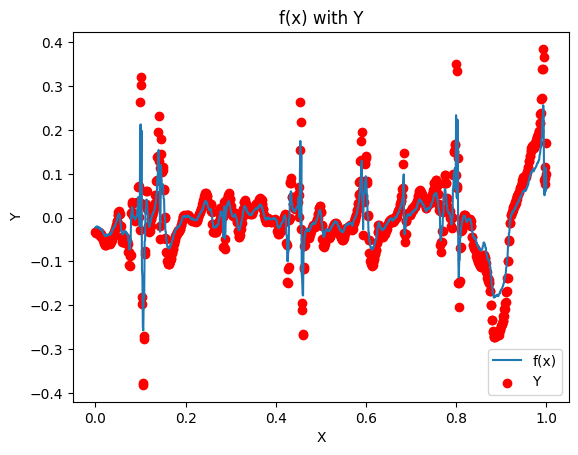

In [ ]:
plt.plot(X_train, calcule_des_f(alphadam,X_train), label='f(x)')
plt.scatter(X_train, Y_train, color='red', label='Y')
plt.title('f(x) with Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## **SGD**

In [ ]:
def sgd(x,y,alphai,Ksigma,l,eps,nu):
    J=[]
    gJ = gradJ(Ksigma, alphai, y, l)
    for i in range(2000):
        a=[np.random.randint(0,x.shape[0]) for _ in range(32)]
        alphai[a]-=nu*gJ[a]
        gJ=gJ = gradJ(Ksigma, alphai, y, l)
        J.append(costFunction(alphai,Ksigma,y,l))
    return alphai,J

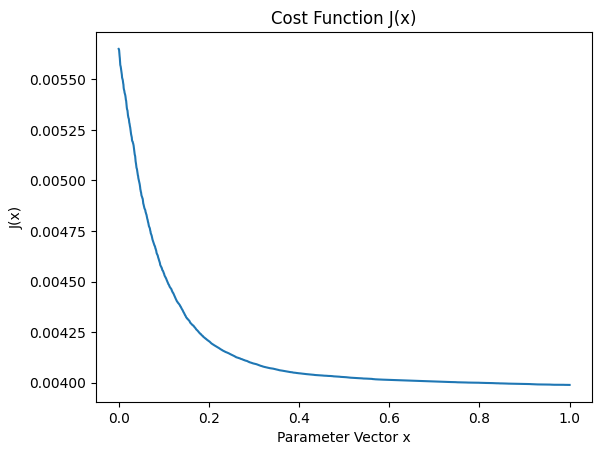

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphasgd = np.zeros((1000,1))

# Generate a range of x values (assuming x is a 1D vector)
x_values = np.linspace(0, 1, 2000)
alphasgd,j_sgd = sgd(x=X_train,y=Y_train,alphai=alphasgd,Ksigma=grand_k,l=lam,eps=0.001,nu=0.01)

# Plot the cost function
plt.plot(x_values, j_sgd)
plt.title('Cost Function J(x)')
plt.xlabel('Parameter Vector x')
plt.ylabel('J(x)')
plt.show()

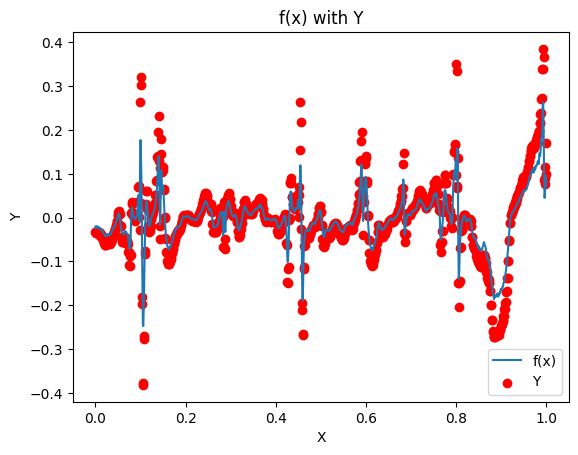

In [ ]:
plt.plot(X_train, calcule_des_f(alphasgd,X_train), label='f(x)')
plt.scatter(X_train, Y_train, color='red', label='Y')
plt.title('f(x) with Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# **Test**

In [ ]:
import numpy as np

def rmse(y_real, y_pred):
    return np.sqrt(np.mean((y_real - y_pred)**2))

In [ ]:
def mse(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)

In [ ]:
print(f"RMSE pour Gradient descent : {rmse(calcule_des_f(alpha,X_test),Y_test)}")
print(f"RMSE pour Adam : {rmse(calcule_des_f(alphadam,X_test),Y_test)}")
print(f"RMSE pour Stochastique Gradient descent : {rmse(calcule_des_f(alphasgd,X_test),Y_test)}")

RMSE pour Gradient descent : 0.020296079820172053
RMSE pour Adam : 0.050432251324413285
RMSE pour Stochastique Gradient descent : 0.012964982580067933


In [ ]:
print(f"MSE pour Gradient descent : {mse(calcule_des_f(alpha,X_test),Y_test)}")
print(f"MSE pour Adam : {mse(calcule_des_f(alphadam,X_test),Y_test)}")
print(f"MSE pour Stochastique Gradient descent : {mse(calcule_des_f(alphasgd,X_test),Y_test)}")

MSE pour Gradient descent : 0.0004119308560667952
MSE pour Adam : 0.0025434119736487855
MSE pour Stochastique Gradient descent : 0.00016809077330146496


# **Regression lineaire**

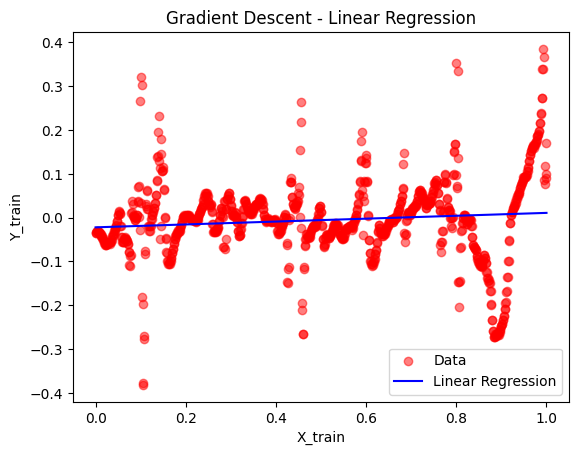

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajouter une colonne de biais à X_train
X_train_b = np.c_[np.ones((1000, 1)), X_train]

# Définir les hyperparamètres
learning_rate = 0.01
n_iterations = 1000
theta = np.random.randn(2, 1)

# Fonction de coût
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - Y))
    return cost

# Descente de gradient
for iteration in range(n_iterations):
    gradients = (1/len(Y_train)) * X_train_b.T.dot(X_train_b.dot(theta) - Y_train)
    theta = theta - learning_rate * gradients
    cost = compute_cost(X_train_b, Y_train, theta)

# Visualisation des résultats
plt.scatter(X_train, Y_train, alpha=0.5, color='red',label='Data')
plt.plot(X_train, X_train_b.dot(theta), color='blue', label='Linear Regression')
plt.title('Gradient Descent - Linear Regression')
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.legend()
plt.show()
